# Latar Belakang Project
COVID-19 merupakan penyakit yang saat ini telah menjadi pandemi secara global. Kondisi menjadi semakin mengkhawatirkan karena hingga detik ini masih belum ditemukan vaksin yang efektif untuk virus penyebab COVID-19. Pemerintah di berbagai negara umumnya dengan sigap membentuk gugus tugas (task force unit) untuk menangani penyebaran COVID-19 di masyarakat, termasuk pemerintah di Indonesia.

Salah satu bentuk aksi yang dilakukan oleh pemerintah adalah dengan mengumpulkan dan menyediakan data pertumbuhan kasus COVID-19 kepada publik. Data pertumbuhan kasus tersebut tidak jarang juga dilengkapi dengan dasbor dan grafik visualisasi pendukung dengan harapan masyarakat dapat memahami informasi dengan lebih mudah. Sebagai contoh adalah portal covid19.go.id besutan Gugus Tugas Penanganan COVID-19 Nasional dan portal PIKOBAR milik pemerintah Provinsi Jawa Barat. Serta banyak portal data COVID-19 lainnya yang disediakan oleh masing-masing pemerintah daerah.

# Respon API
 
Ada beberapa jenis status code yang umumnya dijumpai, antara lain:

200 Artinya permintaan sukses dipenuhi.

404 Artinya berkas yang diminta tidak dapat ditemukan.

500 Artinya akses permintaan ditolak.

501 Artinya terjadi kesalahan pada server.



In [1]:
import requests
resp = requests.get('https://storage.googleapis.com/dqlab-dataset/update.json', verify=False)
print(resp)

<Response [200]>


C:\Users\Acer\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


# Headers API

Status permintaan melalui API sukses dipenuhi! Menjalankan attribut headers pada resp untuk mengetahui metadata apa saja yang tersimpan. Tampilkan dengan menggunakan fungsi print. 

In [2]:
print(resp.headers)

{'X-GUploader-UploadID': 'ADPycduMokL7PMuv4HK7LEHjQR9NC0oobwYagP6RdbaUqVILfCz7mBAj9z4mnJN0TcVXpn8G6oX5oTOCEnXxlI14pJMsNA', 'x-goog-generation': '1654513959565478', 'x-goog-metageneration': '1', 'x-goog-stored-content-encoding': 'identity', 'x-goog-stored-content-length': '311897', 'x-goog-hash': 'crc32c=GMMqEA==, md5=8aR/820+lfYyWNlv5bLUOQ==', 'x-goog-storage-class': 'STANDARD', 'Accept-Ranges': 'bytes', 'Content-Length': '311897', 'Server': 'UploadServer', 'Date': 'Fri, 28 Jul 2023 13:12:27 GMT', 'Expires': 'Fri, 28 Jul 2023 14:12:27 GMT', 'Cache-Control': 'public, max-age=3600', 'Last-Modified': 'Mon, 06 Jun 2022 11:12:39 GMT', 'ETag': '"f1a47ff36d3e95f63258d96fe5b2d439"', 'Content-Type': 'application/json', 'Age': '218', 'Alt-Svc': 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000'}


# Mengekstrak Isi Respon

Respon API dengan status code 200 menyatakan bahwa permintaan berhasil dipenuhi dan konten yang diminta tersedia untuk diekstrak. 

Selain itu juga telah mengetahui lewat attribut headers bahwa konten yang diminta tersedia dalam bentuk application/json, yaitu berkas JSON.

Selanjutnya dapat mengekstrak konten tersebut dengan menggunakan method json(). Method json() merupakan builtin JSON decoder untuk mengekstrak content bertipe JSON.

Menggunakan attribut content tetapi ini berupa binary content yang perlu Anda proses kembali nantinya. 

Jalankan method json() pada obyek resp dan simpanlah hasilnya sebagai cov_id_raw!
cov_id_raw ini bertipe data dict.


In [3]:
cov_id_raw = resp.json()

# Mengekstrak isi Respon - 2

Dengan menggunakan fungsi len() dan method keys() mencoba amati ada berapa komponen serta apa saja nama komponen dalam obyek cov_id_raw tersebut! 

Kemudian ekstraklah key ke-2 dan simpan dengan nama cov_id_update.

In [4]:
print('Length of cov_id_raw : %d.' %len(cov_id_raw))
print('Komponen cov_id_raw  : %s.' %cov_id_raw.keys())
cov_id_update = cov_id_raw['update']


Length of cov_id_raw : 2.
Komponen cov_id_raw  : dict_keys(['data', 'update']).


# Analisa Data

Fokus pada obyek cov_id_update untuk menjawab pertanyaan-pertanyaan berikut:
- Kapan tanggal pembaharuan data penambahan kasus?
- Berapa jumlah penambahan kasus sembuh?
- Berapa jumlah penambahan kasus meninggal?
- Berapa jumlah total kasus positif hingga saat ini?
- Berapa jumlah total kasus meninggal hingga saat ini?


In [5]:
print('Tanggal pembaharuan data penambahan kasus   :', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh              :', cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal           :', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini  :', cov_id_update['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini:', cov_id_update['total']['jumlah_meninggal'])

Tanggal pembaharuan data penambahan kasus   : 2022-05-14
Jumlah penambahan kasus sembuh              : 416
Jumlah penambahan kasus meninggal           : 5
Jumlah total kasus positif hingga saat ini  : 6050519
Jumlah total kasus meninggal hingga saat ini: 156453


# Apa Kabar Jawa Barat?
Berhasil menjawab pertanyaan mengenai kondisi COVID-19 di Indonesia dengan menggunakan data yang langsung diambil menggunakan API. Namun bagaimana jika ingin berfokus dengan data COVID-19 di provinsi tempat menetap saat ini?

covid19.go.id menyediakan data kasus COVID-19 tingkat provinsi di alamat API yang berbeda. Sebagai data mengenai COVID-19 Jawa Barat, tempat tinggal saya sekarang, tersedia di https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json.


In [8]:
import requests
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
print(resp_jabar)


<Response [200]>


C:\Users\Acer\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'storage.googleapis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [10]:
print(resp_jabar.headers)

{'X-GUploader-UploadID': 'ADPycdtzr5I8gsm5nQZPoyJfPNqKcEv1JRJtlyP5fhAIA2-SFInWpv_d5uvEiRIaTl5YMgCAhsLsYNV3GLZ9oI-jMA9mkg', 'x-goog-generation': '1654511712896796', 'x-goog-metageneration': '1', 'x-goog-stored-content-encoding': 'identity', 'x-goog-stored-content-length': '181144', 'x-goog-hash': 'crc32c=TKRK/g==, md5=n6a8cBSM/WFGV4apX6XLXw==', 'x-goog-storage-class': 'STANDARD', 'Accept-Ranges': 'bytes', 'Content-Length': '181144', 'Server': 'UploadServer', 'Date': 'Fri, 28 Jul 2023 13:25:02 GMT', 'Expires': 'Fri, 28 Jul 2023 14:25:02 GMT', 'Cache-Control': 'public, max-age=3600', 'Age': '84', 'Last-Modified': 'Mon, 06 Jun 2022 10:35:12 GMT', 'ETag': '"9fa6bc70148cfd61465786a95fa5cb5f"', 'Content-Type': 'application/json', 'Alt-Svc': 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000'}


In [11]:
cov_jabar_raw = resp_jabar.json()

# Memahami Kasus COVID-19 di Jawa Barat
Sekarang menjalankan method keys() pada cov_jabar_raw tersebut untuk mengetahui nama-nama elemen utama yang tersedia dan jawablah pertanyaan berikut:
- Berapa jumlah total kasus COVID-19 di Jawa Barat?
- Berapa persentase kematian akibat COVID-19 di Jawa Barat?
- Berapa persentase tingkat kesembuhan dari COVID-19 di Jawa Barat?


In [12]:
print('Nama-nama elemen utama:\n', cov_jabar_raw.keys())
print('\nJumlah total kasus COVID-19 di Jawa Barat                 : %d' %cov_jabar_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Jawa Barat         : %f.2%%' %cov_jabar_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : %f.2%%' %cov_jabar_raw['sembuh_persen'])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Jawa Barat                 : 1105134
Persentase kematian akibat COVID-19 di Jawa Barat         : 1.425619.2%
Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : 98.282380.2%


# Memperoleh Informasi yang Lebih Lengkap
 
Informasi umum mengenai COVID-19 di Jawa Barat telah didapatkan. Namun informasi akan lebih lengkap jika Anda memiliki data perkembangan COVID-19 dari waktu ke waktu, apakah Anda setuju?
Kabar baiknya adalah informasi tersebut juga disediakan oleh covid19.go.id melalui permintaan API yang telah Anda buat sebelumnya (atau https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json). 

Data historis perkembangan COVID-19 tersebut tersimpan dengan nama list_perkembangan. Ekstrak data tersebut dari cov_jabar_raw dan untuk lebih memudahkan dalam menginspeksi data ubahlah data bertipe dict ke pandas dataframe. Kemudian simpanlah hasilnya sebagai obyek bernama cov_jabar! Amati struktur cov_jabar menggunakan method info() dan head().


In [13]:
import numpy as np
import pandas as pd

cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])
print('Info cov_jabar:\n', cov_jabar.info())
print('\nLima data teratas cov_jabar:\n', cov_jabar.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       785 non-null    int64
 1   KASUS                         785 non-null    int64
 2   MENINGGAL                     785 non-null    int64
 3   SEMBUH                        785 non-null    int64
 4   DIRAWAT_OR_ISOLASI            785 non-null    int64
 5   AKUMULASI_KASUS               785 non-null    int64
 6   AKUMULASI_SEMBUH              785 non-null    int64
 7   AKUMULASI_MENINGGAL           785 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  785 non-null    int64
dtypes: int64(9)
memory usage: 55.3 KB
Info cov_jabar:
 None

Lima data teratas cov_jabar:
          tanggal  KASUS  MENINGGAL  SEMBUH  DIRAWAT_OR_ISOLASI  \
0  1583193600000      1          1       0                   0   
1  1583280000000      1          0       0   

# Menjinakkan Data
 
Setelah mengekstrak dan mengamati cov_jabar, Menemukan beberapa kejanggalan pada data tersebut. 

Diantaranya adalah kejanggalan data pada kolom tanggal dan format penulisan kolom yang tidak konsisten. 

Sekarang akan mencoba melakukan beberapa tahapan untuk menjinakan data tersebut sehingga dapat diolah dan dianalisis dengan lebih mudah.

Ada beberapa tahapan yang akan dilakukan untuk menjinakan data cov_jabar, yaitu:
- Menghapus kolom DIRAWAT_OR_ISOLASI dan semua kolom yang berisi nilai kumulatif
- Merubah format penulisan semua kolom menjadi huruf kecil
- Mengganti nama kolom kasus menjadi kasus_baru
- Memperbaiki tipe data pada kolom tanggal menggunakan pd.to_datetime

Melengkapi baris kode untuk melakukan menjinakan data sesuai dengan tahapan yang telah direncanakan.Menggunakan teknik chaining pada dataframe. 

Menyimpan hasil pengolahan dengan nama cov_jabar_tidy


In [14]:
cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_jabar_tidy.head())


Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-03           1          1       0
1 2020-03-04           1          0       0
2 2020-03-05           1          0       0
3 2020-03-06           1          0       0
4 2020-03-07           0          0       0


# Menunjukkan Melalui Gambar

Setelah memiliki data yang jinak, Mengekspresikan data tersebut dalam bentuk lain yang harapannya lebih mudah dicerna: grafik. 

Memulai merancang visualisasi yang memiliki estetika dengan menggunakan library matplotlib.

Imporlah library tersebut sebagai aliasnya!


In [15]:
import matplotlib.pyplot as plt

# Menunjukkan Melalui Gambar - 2
 
Berikut merupakan template kode untuk membuat visualisasi menggunakan matplotlib:
 
Berdasarkan templat tersebut, komponen utama untuk membuat visualisasi antara lain adalah tabel data, kolom data, serta bentuk geometri untuk mempresentasikan data. 

Sebagai contoh untuk membuat scatter-plot yang diperlukan adalah bentuk geometri titik (.scatter()), line-chart memerlukan geometri garis (.plot()), sedangkan bar-chart memerlukan bentuk geometri batang atau kolom (.bar()).

Melengkapi baris kode untuk membuat bar-chart jumlah kasus baru harian COVID-19 di Jawa Barat menggunakan data cov_jabar_tidy. Menggunakan kolom tanggal sebagai sumbu-x.
Kondisi COVID19 di Jawa Barat hingga Oktober 2020 dan untuk kondisi hingga awal Juli 2021.


<Figure size 640x480 with 0 Axes>

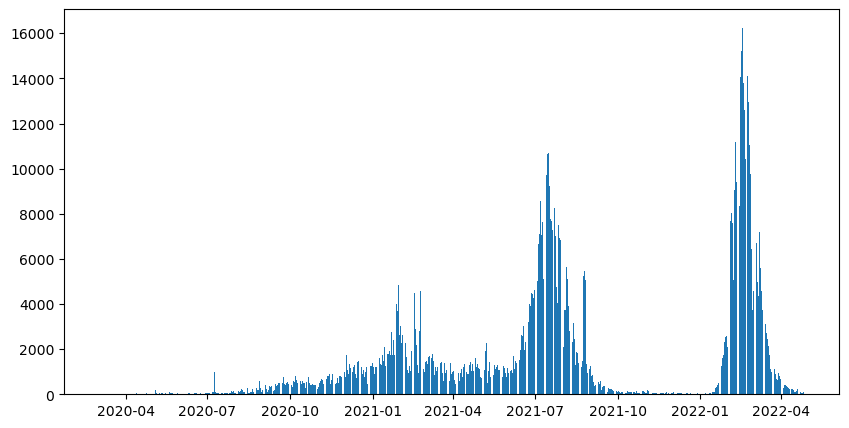

In [16]:

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru')
plt.show()


# Informasi pada Grafik

Berhasil membuat bar-chart yang diminta. Namun grafik tersebut belum memiliki informasi yang jelas serta cenderung membosankan untuk dilihat. Membuat kembali grafik tersebut dengan menggunakan baris kode yang telah dimodifikasi berikut.

C:\Users\Acer\AppData\Local\Temp\ipykernel_18016\4238932847.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 640x480 with 0 Axes>

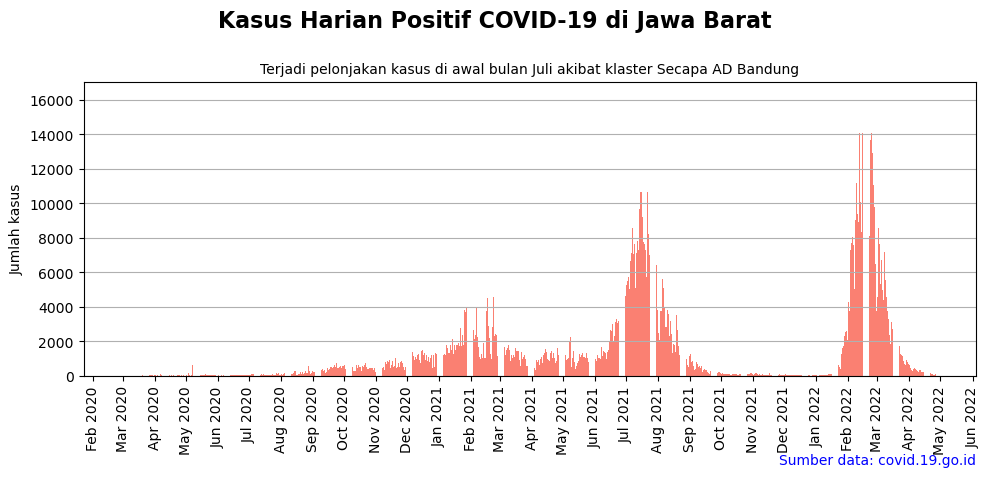

In [18]:
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di Jawa Barat', 
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Terjadi pelonjakan kasus di awal bulan Juli akibat klaster Secapa AD Bandung',
             fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Grafik untuk Kasus Sembuh
Buat grafik serupa dengan menggunakan data kasus sembuh menggunakan warna olivedrab.

C:\Users\Acer\AppData\Local\Temp\ipykernel_18016\3343767107.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 640x480 with 0 Axes>

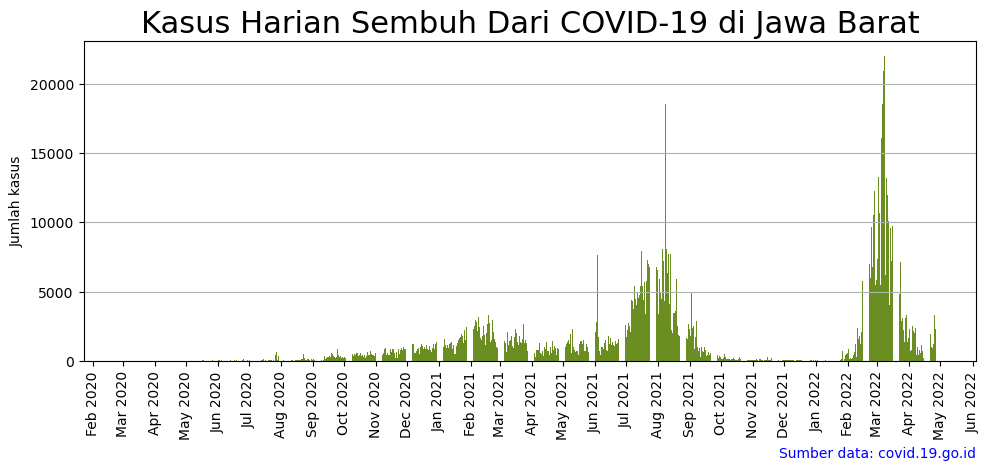

In [19]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Grafik untuk Kasus Meninggal
Buat grafik serupa dengan menggunakan data kasus meninggal menggunakan warna slategrey.

C:\Users\Acer\AppData\Local\Temp\ipykernel_18016\3344377878.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 640x480 with 0 Axes>

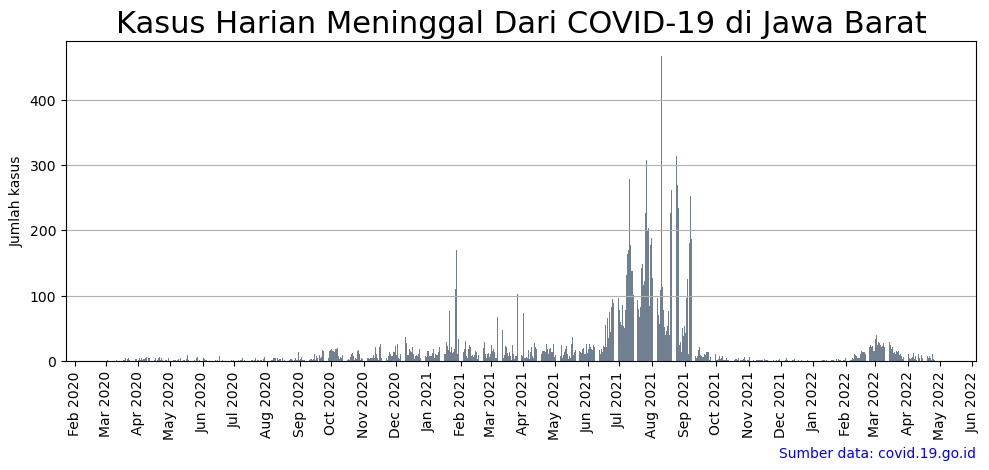

In [20]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Apakah Pekan ini Lebih Baik?

Setelah mengamati grafik perkembangan kasus Anda menyadari bahwa terjadi fluktuasi pertambahan kasus harian. Dilandasi hal tersebut kemudian ingin mencoba mengamati bagaimana perkembangan kasus dalam rentang waktu pekanan. 

Mengerjakannya dibantu melalui predefined code, yaitu set terlebih dahulu kolom tanggal pada cov_jabar_tidy sebagai index. 

Kemudian menerapkan method pada time series di pandas, resampling per pekan dan gunakan agregasi penjumlahan. Adapun yang akan digunakan untuk mengekstrak informasi pekan dalam satu tahun adalah weekofyear dan year untuk tahun.

Melengkapi baris kode berikut untuk menghitung pertambahan kasus pekanan dan simpanlah hasilnya sebagai cov_jabar_pekanan. Menggunakan method info() dan .head() untuk melakukan inspeksi data.


In [21]:
cov_jabar_pekanan = (cov_jabar_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_jabar_pekanan['pekan_ke'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_jabar_pekanan:')
print(cov_jabar_pekanan.info())
print('\nLima data teratas cov_jabar_pekanan:\n', cov_jabar_pekanan.head())


Info cov_jabar_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     113 non-null    int64
 1   pekan_ke  113 non-null    int64
 2   jumlah    113 non-null    int64
dtypes: int64(3)
memory usage: 2.8 KB
None

Lima data teratas cov_jabar_pekanan:
    tahun  pekan_ke  jumlah
0   2020        10       4
1   2020        11       5
2   2020        12      44
3   2020        13      80
4   2020        14      89


# Menjawab Pertanyaan
 
"Apakah pekan ini lebih baik dari pekan kemarin?"
Demi menjawab hal tersebut Anda melakukan kalkulasi sederhana dengan tahapan berikut:

- Membuat kolom baru yang berisi jumlah kasus baru dalam satu pekan sebelumnya. Kolom ini diberi nama jumlah_pekanlalu.
- Mengganti nilai NaN pada kolom jumlah_pekanlalu dengan nilai 0.
- Melakukan komparasi antara kolom jumlah dengan kolom jumlah_pekanlalu. Hasil komparasi ini disimpan dalam kolom baru dengan nama lebih_baik, isinya adalah True apabila jumlah kasus baru pekan ini lebih rendah dibandingkan jumlah kasus pekan lalu.

Melengkapilah baris predefined kode yang diberikan untuk mengerjakan tahapan yang telah direncanakan. Menggunakan method shift() untuk membuat kolom jumlah_pekanlalu. 

Inspeksi hasil pekerjaan dengan menggunakan head(10)!


In [22]:
cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jabar_pekanan['lebih_baik'] = cov_jabar_pekanan['jumlah'] < cov_jabar_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_jabar_pekanan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        10       4                 0       False
1   2020        11       5                 4       False
2   2020        12      44                 5       False
3   2020        13      80                44       False
4   2020        14      89                80       False
5   2020        15     176                89       False
6   2020        16     203               176       False
7   2020        17     136               203        True
8   2020        18     100               136        True
9   2020        19     914               100       False


C:\Users\Acer\AppData\Local\Temp\ipykernel_18016\3801773798.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)


# Membuat Bar Chart

Dengan menggunakan data hasil perhitungan tersebut maka sekarang dapat membuat bar-chat penambahan kasus pekanan yang ditambahkan informasi baru untuk menjawab pertanyaan: "Apakah pekan ini lebih baik?"

<Figure size 640x480 with 0 Axes>

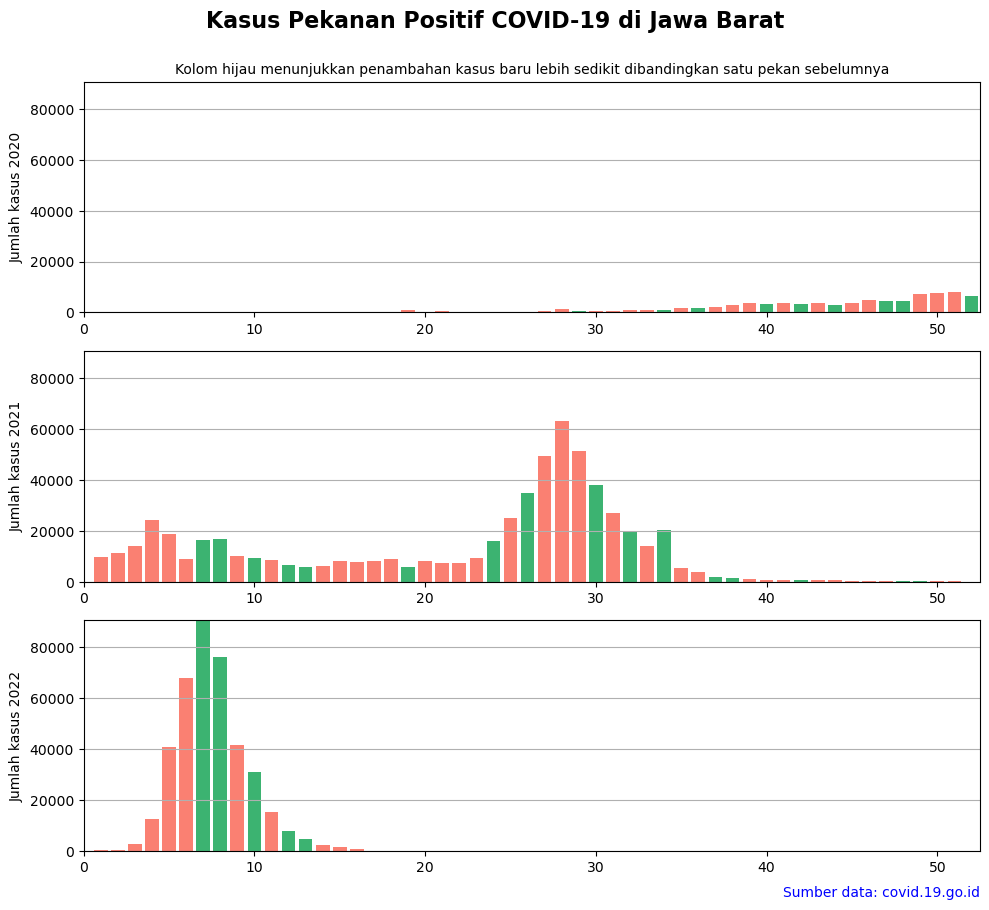

In [23]:
plt.clf()
jml_tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].nunique()
tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].unique()
fig, axes = plt.subplots(nrows=jml_tahun_terjadi_covid19, 
                         figsize=(10,3*jml_tahun_terjadi_covid19))

fig.suptitle('Kasus Pekanan Positif COVID-19 di Jawa Barat', 
             y=1.00, fontsize=16, fontweight='bold', ha='center')
for i, ax in enumerate(axes):
    ax.bar(data=cov_jabar_pekanan.loc[cov_jabar_pekanan['tahun']==tahun_terjadi_covid19[i]], 
           x='pekan_ke', height='jumlah', 
           color=['mediumseagreen' if x is True else 'salmon' 
                  for x in cov_jabar_pekanan['lebih_baik']])
    if i == 0:
        ax.set_title('Kolom hijau menunjukkan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',
                     fontsize=10)
    elif i == jml_tahun_terjadi_covid19-1:
        ax.text(1, -0.2, 'Sumber data: covid.19.go.id', color='blue',
            ha='right', transform=ax.transAxes)

    ax.set_xlim([0, 52.5])
    ax.set_ylim([0, max(cov_jabar_pekanan['jumlah'])])
    ax.set_xlabel('')
    ax.set_ylabel('Jumlah kasus %d'%(tahun_terjadi_covid19[i],))
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

# Pola dan Dinamika
 
Ada yang akhirnya sembuh, namun tak sedikit pula yang meninggal akibat COVID-19. Sementara itu penambahan kasus baru terus terjadi di masyarakat. Hal ini mungkin memicu pertanyaan lain: "Hingga saat ini ada berapa kasus yang masih aktif?"
Aktif dalam artian sedang dalam perawatan atau isolasi.

Jumlah kasus aktif dapat dihitung dengan cara mengurangi jumlah akumulasi positif dengan jumlah akumulasi sembuh dan jumlah akumulasi meninggal. Menggunakan method cumsum() untuk menghitung nilai akumulasi dari suatu vektor numerik. Melengkapilah baris kode untuk menghitung jumlah akumulasi kasus aktif, kasus sembuh, dan kasus meninggal.


In [24]:
cov_jabar_akumulasi = cov_jabar_tidy[['tanggal']].copy()
cov_jabar_akumulasi['akumulasi_aktif'] = (cov_jabar_tidy['kasus_baru'] - cov_jabar_tidy['sembuh'] - cov_jabar_tidy['meninggal']).cumsum()
cov_jabar_akumulasi['akumulasi_sembuh'] = cov_jabar_tidy['sembuh'].cumsum()
cov_jabar_akumulasi['akumulasi_meninggal'] = cov_jabar_tidy['meninggal'].cumsum()
print(cov_jabar_akumulasi.tail())

       tanggal  akumulasi_aktif  akumulasi_sembuh  akumulasi_meninggal
780 2022-04-22            10753           1078344                15735
781 2022-04-23             9882           1079297                15737
782 2022-04-24             8709           1080519                15748
783 2022-04-25             5428           1083851                15751
784 2022-04-26             3253           1086129                15752


# Membuat Line Chart

Buat line-chart pola kasus aktif dengan menggunakan method plot pada ax.

C:\Users\Acer\AppData\Local\Temp\ipykernel_18016\1331996753.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


<Figure size 640x480 with 0 Axes>

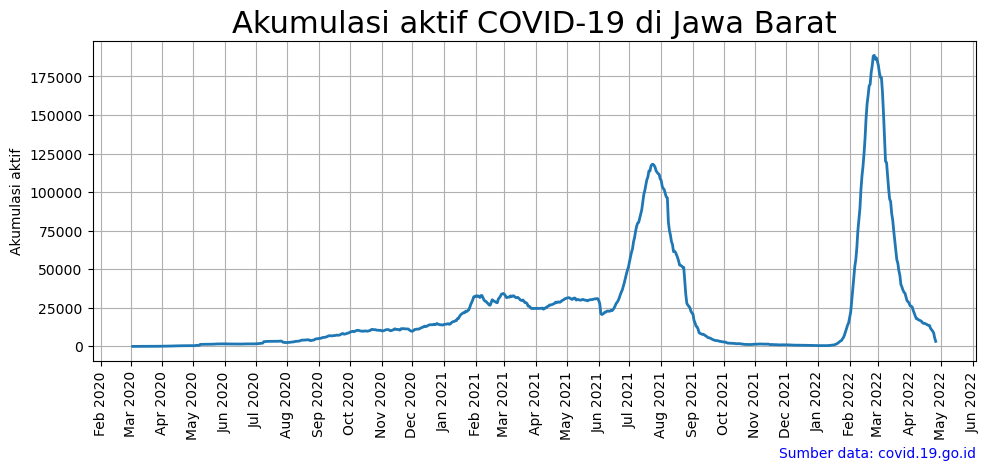

In [25]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_jabar_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

# Grafik komparasi antara akumulasi kasus aktif, kasus sembuh, dan kasus meninggal.

Ada dua pilihan cara yang dapat ditempuh untuk membuat grafik tersebut:
1. Menggunakan data frame cov_jabar_akumulasi, dengan kolom bertipe datetime diset menjadi index sehingga kita memiliki time series dataframe. Kemudian kita secara langsung dapat melakukan line plot dan memilih warna garis yang sesuai untuk membedakan; atau
2. Menggunakan ax.plot() dan mengisikan kolom-kolom yang masing-masingnya menjadi x dan y dengan data=cov_jabar_akumulasi, dan kemudian menset warna berbeda untuk ketiga line plot.


<Figure size 640x480 with 0 Axes>

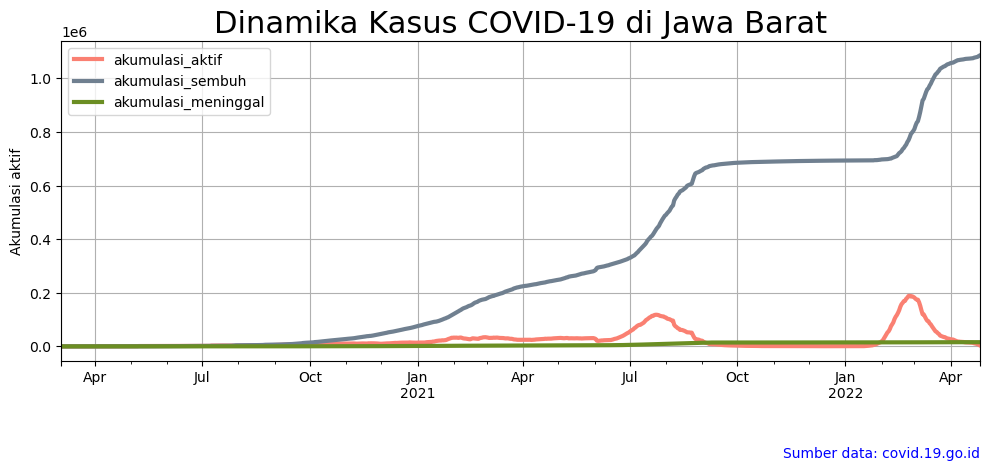

In [26]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
cov_jabar_akumulasi_ts = cov_jabar_akumulasi.set_index('tanggal')
cov_jabar_akumulasi_ts.plot(kind='line', ax=ax, lw=3,
                            color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

plt.grid()
plt.tight_layout()
plt.show()


# Kesimpulan & Penutup

Telah berhasil melakukan impor data melalui API, melakukan transformasi data, serta membuat visualisasi untuk mengkomunikasikan hasil analisis data tentang COVID-19.

Semoga Anda tetap sehat, waspada dan tetap tenang dalam menghadapi pandemi COVID-19. Selamat dan sukses selalu!
